## Final Project Submission

Please fill out:
* Student name: AUSTIN MURUNGA
* Student pace: HYBRID full time
* Scheduled project review date/time: 
* Instructor name: ANTONNY MUIKO
* Blog post URL:


## Project Overview 
Objective:

Analyze data from Box Office Mojo, IMDB, and The Numbers to generate actionable insights. These insights will guide the new movie studio in emphasizing the identification of successful genres, ratings, and box office performance to maximize profitability.

## Business Understanding

The company aims to start a new movie studio but lacks production experience. They need insights on successful films to guide their strategy. They seek to understand which genres perform best, how ratings influence box office success, key factors for financial performance, and recent trends. This analysis will help determine which types of films to produce for profitability.

## Data Understanding

For this project, we will use the following Datasets:

* Box Office Mojo

* IMDB

* The Numbers
These will help identify successful film types and strategies for profitability.

In [1]:
# import libraries 

import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt 
import zipfile
import gzip
import sqlite3


## Loading Data

### 1. Box Office 

In [2]:
#loading the data 
#Loading Box Office Mojo Data, head
box_office = pd.read_csv(r'zippedData\bom.movie_gross.csv')
box_office.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### 3. IMDB

In [3]:
#define the path
imdb_path = r'C:\Users\User\OneDrive\Desktop\phase 2 proj\dsc-phase-2-project-v3\zippedData\im.db.zip'

# Extract the zip file
with zipfile.ZipFile(imdb_path, 'r') as zip_ref:
    zip_ref.extractall()

# Connect to the SQLite Database
conn = sqlite3.connect('im.db')

# Load the tables into a DataFrame
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
print(movie_basics.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


### 4. The Numbers

In [4]:
#loading The Numbers data, head 
tn_movies = pd.read_csv(r'zippedData\tn.movie_budgets.csv')
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Overview

### 1. Box Office

In [5]:
box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
#shape
box_office.shape

(3387, 5)

### 2. IMDB

In [7]:
#query way
conn = sqlite3.connect("im.db")
q = """
SELECT
    mb.primary_title,
    mb.genres,
    p.primary_name
FROM movie_basics AS mb
JOIN directors AS d
    ON mb.movie_id = d.movie_id
JOIN persons AS p
    ON d.person_id = p.person_id
GROUP BY mb.primary_title
HAVING primary_profession LIKE '%director%'
"""
imdb = pd.read_sql(q, conn)

#info
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121179 entries, 0 to 121178
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   primary_title  121179 non-null  object
 1   genres         118367 non-null  object
 2   primary_name   121179 non-null  object
dtypes: object(3)
memory usage: 2.8+ MB


In [8]:
#shape
imdb.shape

(121179, 3)

In [9]:
#more insights
imdb.head()

,primary_title,genres,primary_name
0,!Women Art Revolution,Documentary,Lynn Hershman-Leeson
1,#1 Serial Killer,Horror,Stanley Yung
2,#5,"Biography,Comedy,Fantasy",Ricky Bardy
3,#50Fathers,Comedy,Joddy Eric Matthews
4,#66,Action,Asun Mawardi


### 3. The Number

In [10]:
#info
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [11]:
#shape
tn_movies.shape

(5782, 6)

## Data Cleaning 

### 1. Box Office 

In [12]:
#null values
box_office.isnull().sum() #returns the sum of all null values

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Dealing with missing values.

I will drop the rows with missing 'studio' values

For domestic_gross and foreign_gross fill with median. After changing values in foreign_gross to float

In [13]:
# Drop the studio column
clean_box_office = box_office.drop(columns=['studio'])

#Rename the 'title' column to 'movie_title'
clean_box_office.rename(columns={'title': 'movie_title'}, inplace=True)

#filling domestic gross and foreign gross with median (numerical column),
#why not mean? avoiding outliers
clean_box_office['domestic_gross'].fillna(clean_box_office['domestic_gross'].median(), inplace=True)

#there are strings in foreign_gross column,, converting to float
clean_box_office['foreign_gross'] = clean_box_office['foreign_gross'].str.replace(',', '').astype(float)

#back to filling 
clean_box_office['foreign_gross'].fillna(clean_box_office['foreign_gross'].median(), inplace=True)


#inspecting the cleaned data
clean_box_office.isnull().sum()

movie_title       0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [14]:
clean_box_office.shape

(3387, 4)

### 2. IMDB

In [15]:
#removing the NaN in genre
imdb.dropna(subset=['genres'])

#rename primary title and primary name to movie title and director name
imdb.rename(columns={'primary_title': 'movie_title', 'primary_name': 'director_name'}, inplace= True)

#head
imdb.head()

,movie_title,genres,director_name
0,!Women Art Revolution,Documentary,Lynn Hershman-Leeson
1,#1 Serial Killer,Horror,Stanley Yung
2,#5,"Biography,Comedy,Fantasy",Ricky Bardy
3,#50Fathers,Comedy,Joddy Eric Matthews
4,#66,Action,Asun Mawardi


### 3. The Number

In [16]:
#checking null values
tn_movies.isnull().sum() #returns the sum of all null values

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

This looks good, lets check for duplicates 

In [17]:
#duplicaated in the id, 
tn_movies.duplicated('id').sum()


5682

In [18]:
#rename the movie to movie_title
tn_movies.rename(columns={'movie': 'movie_title'}, inplace= True)


#remove the date, to remain with the year
tn_movies ['release_month'] = tn_movies['release_date'].str[:3]


tn_movies.head()

,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,release_month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec


In [19]:
#remove columns
tn_movies = tn_movies.drop(columns = ['id', 'domestic_gross', 'release_date'])


tn_movies.head()

,movie_title,production_budget,worldwide_gross,release_month
0,Avatar,"$425,000,000","$2,776,345,279",Dec
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875",May
2,Dark Phoenix,"$350,000,000","$149,762,350",Jun
3,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963",May
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747",Dec


In [20]:
#convert production_budget and worldwide_gross to floats
tn_movies['production_budget'] = tn_movies['production_budget'].replace('[\$,]', '', regex= True).astype(float)
tn_movies['worldwide_gross'] =  tn_movies['worldwide_gross'].replace('[\$,]', '', regex= True).astype(float)

tn_movies.head()

,movie_title,production_budget,worldwide_gross,release_month
0,Avatar,425000000.0,2.776345e+09,Dec
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,May
2,Dark Phoenix,350000000.0,1.497624e+08,Jun
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,May
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,Dec


In [21]:
#convert worldwide_gross to 2 decimal places 
pd.set_option('display.float_format', '{:.2f}'.format)

tn_movies.tail()

,movie_title,production_budget,worldwide_gross,release_month
5777,Red 11,7000.00,0.00,Dec
5778,Following,6000.00,240495.00,Apr
5779,Return to the Land of Wonders,5000.00,1338.00,Jul
5780,A Plague So Pleasant,1400.00,0.00,Sep
5781,My Date With Drew,1100.00,181041.00,Aug


In [22]:
#remove 0 values in worldwide_gross 
tn_movies= tn_movies[tn_movies['worldwide_gross'] != 0]

tn_movies.tail()

,movie_title,production_budget,worldwide_gross,release_month
5775,Cavite,7000.00,71644.00,May
5776,The Mongol King,7000.00,900.00,Dec
5778,Following,6000.00,240495.00,Apr
5779,Return to the Land of Wonders,5000.00,1338.00,Jul
5781,My Date With Drew,1100.00,181041.00,Aug


## Visualizations of the Cleaned data 

### 1. Box Office

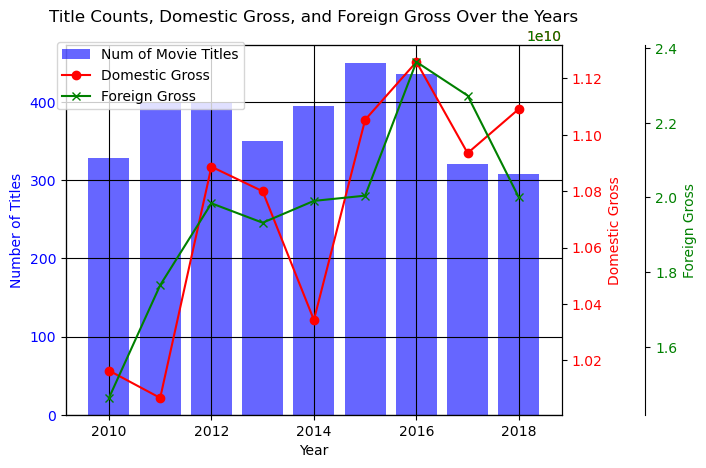

In [23]:
#visualization
# grouped by years to get title count and sum of domestic and foreign gross

clean_box_office_grouped = clean_box_office.groupby('year').agg({
    'movie_title': 'count',
    'domestic_gross': 'sum',
    'foreign_gross': 'sum'
}).reset_index()

# subplots
fig, ax1 = plt.subplots()

# Bar plot for title counts
ax1.bar(clean_box_office_grouped['year'], clean_box_office_grouped['movie_title'], color='blue', alpha=0.6, label='Num of Movie Titles')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Titles', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#second y-axis
ax2 = ax1.twinx()
ax2.plot(clean_box_office_grouped['year'], clean_box_office_grouped['domestic_gross'], color='red', marker='o', label='Domestic Gross')
ax2.set_ylabel('Domestic Gross', color='red')
ax2.tick_params(axis='y', labelcolor='red')

#third y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(clean_box_office_grouped['year'], clean_box_office_grouped['foreign_gross'], color='g', marker='x', label='Foreign Gross')
ax3.set_ylabel('Foreign Gross', color='g')
ax3.tick_params(axis='y', labelcolor='g')

#legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

#grid with pink color
ax1.grid(True, color='black')
ax2.grid(False)  #grid for the second y-axis not needed

#Title of the plot
plt.title('Title Counts, Domestic Gross, and Foreign Gross Over the Years')

#Show plot
plt.show()

In [24]:
clean_box_office.columns

Index(['movie_title', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

## Merging Data 

In [25]:
#confirming how the data from all the datasets looks like 
print(tn_movies.info())
tn_movies.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5415 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_title        5415 non-null   object 
 1   production_budget  5415 non-null   float64
 2   worldwide_gross    5415 non-null   float64
 3   release_month      5415 non-null   object 
dtypes: float64(2), object(2)
memory usage: 211.5+ KB
None


,movie_title,production_budget,worldwide_gross,release_month
0,Avatar,425000000.00,2776345279.00,Dec
1,Pirates of the Caribbean: On Stranger Tides,410600000.00,1045663875.00,May
2,Dark Phoenix,350000000.00,149762350.00,Jun
3,Avengers: Age of Ultron,330600000.00,1403013963.00,May
4,Star Wars Ep. VIII: The Last Jedi,317000000.00,1316721747.00,Dec


In [26]:
print(clean_box_office.info())
clean_box_office.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     3387 non-null   object 
 1   domestic_gross  3387 non-null   float64
 2   foreign_gross   3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 106.0+ KB
None


,movie_title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.00,652000000.00,2010
1,Alice in Wonderland (2010),334200000.00,691300000.00,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.00,664300000.00,2010
3,Inception,292600000.00,535700000.00,2010
4,Shrek Forever After,238700000.00,513900000.00,2010


In [27]:
print(imdb.info())
imdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121179 entries, 0 to 121178
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   movie_title    121179 non-null  object
 1   genres         118367 non-null  object
 2   director_name  121179 non-null  object
dtypes: object(3)
memory usage: 2.8+ MB
None


,movie_title,genres,director_name
0,!Women Art Revolution,Documentary,Lynn Hershman-Leeson
1,#1 Serial Killer,Horror,Stanley Yung
2,#5,"Biography,Comedy,Fantasy",Ricky Bardy
3,#50Fathers,Comedy,Joddy Eric Matthews
4,#66,Action,Asun Mawardi


I will merged the Box Office data, IMDB and The Number data. I will perform two different merges; merge 1 will have Box office and IMDB. then Movie Merged(Final merge) The Number data will come in. Inner Joins

In [28]:
#merging box office and imdb on movie tittle, inner join
merge_1 = pd.merge(clean_box_office, imdb, on=['movie_title'], how='inner')
merge_1.head()

,movie_title,domestic_gross,foreign_gross,year,genres,director_name
0,Inception,292600000.00,535700000.00,2010,"Action,Adventure,Sci-Fi",Christopher Nolan
1,Shrek Forever After,238700000.00,513900000.00,2010,"Adventure,Animation,Comedy",Mike Mitchell
2,The Twilight Saga: Eclipse,300500000.00,398000000.00,2010,"Adventure,Drama,Fantasy",David Slade
3,Tangled,200800000.00,391000000.00,2010,"Adventure,Animation,Comedy",Byron Howard
4,Despicable Me,251500000.00,291600000.00,2010,"Animation,Comedy,Family",Chris Renaud


In [29]:
#bringing The Number on board 
movie_merged = pd.merge(merge_1, tn_movies, on=['movie_title'], how= 'inner')
movie_merged.head()

,movie_title,domestic_gross,foreign_gross,year,genres,director_name,production_budget,worldwide_gross,release_month
0,Inception,292600000.00,535700000.00,2010,"Action,Adventure,Sci-Fi",Christopher Nolan,160000000.00,835524642.00,Jul
1,Shrek Forever After,238700000.00,513900000.00,2010,"Adventure,Animation,Comedy",Mike Mitchell,165000000.00,756244673.00,May
2,The Twilight Saga: Eclipse,300500000.00,398000000.00,2010,"Adventure,Drama,Fantasy",David Slade,68000000.00,706102828.00,Jun
3,Tangled,200800000.00,391000000.00,2010,"Adventure,Animation,Comedy",Byron Howard,260000000.00,586477240.00,Nov
4,Despicable Me,251500000.00,291600000.00,2010,"Animation,Comedy,Family",Chris Renaud,69000000.00,543464573.00,Jul


In [30]:
#checking what we have 
movie_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_title        1057 non-null   object 
 1   domestic_gross     1057 non-null   float64
 2   foreign_gross      1057 non-null   float64
 3   year               1057 non-null   int64  
 4   genres             1055 non-null   object 
 5   director_name      1057 non-null   object 
 6   production_budget  1057 non-null   float64
 7   worldwide_gross    1057 non-null   float64
 8   release_month      1057 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 74.4+ KB


The business has to make profits in refence to the returns on inverstments, I will create another column Return On Investiment(ROI) globally. This will be the difference of Worldwide Gross and Production Budget

In [31]:
#a new column called ROI
movie_merged['ROI'] = movie_merged['worldwide_gross'] - movie_merged['production_budget']
movie_merged.head()

,movie_title,domestic_gross,foreign_gross,year,genres,director_name,production_budget,worldwide_gross,release_month,ROI
0,Inception,292600000.00,535700000.00,2010,"Action,Adventure,Sci-Fi",Christopher Nolan,160000000.00,835524642.00,Jul,675524642.00
1,Shrek Forever After,238700000.00,513900000.00,2010,"Adventure,Animation,Comedy",Mike Mitchell,165000000.00,756244673.00,May,591244673.00
2,The Twilight Saga: Eclipse,300500000.00,398000000.00,2010,"Adventure,Drama,Fantasy",David Slade,68000000.00,706102828.00,Jun,638102828.00
3,Tangled,200800000.00,391000000.00,2010,"Adventure,Animation,Comedy",Byron Howard,260000000.00,586477240.00,Nov,326477240.00
4,Despicable Me,251500000.00,291600000.00,2010,"Animation,Comedy,Family",Chris Renaud,69000000.00,543464573.00,Jul,474464573.00


In [32]:
movie_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_title        1057 non-null   object 
 1   domestic_gross     1057 non-null   float64
 2   foreign_gross      1057 non-null   float64
 3   year               1057 non-null   int64  
 4   genres             1055 non-null   object 
 5   director_name      1057 non-null   object 
 6   production_budget  1057 non-null   float64
 7   worldwide_gross    1057 non-null   float64
 8   release_month      1057 non-null   object 
 9   ROI                1057 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 82.7+ KB


I have to re-arrange the columns to address the problem methodoligically

In [33]:
# Reorder the columns in the DataFrame
movie_merged = movie_merged[['movie_title', 'year', 'release_month', 'genres', 'director_name', 'production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'ROI']]

# Display the first few rows to confirm the change
movie_merged.head()


,movie_title,year,release_month,genres,director_name,production_budget,domestic_gross,foreign_gross,worldwide_gross,ROI
0,Inception,2010,Jul,"Action,Adventure,Sci-Fi",Christopher Nolan,160000000.00,292600000.00,535700000.00,835524642.00,675524642.00
1,Shrek Forever After,2010,May,"Adventure,Animation,Comedy",Mike Mitchell,165000000.00,238700000.00,513900000.00,756244673.00,591244673.00
2,The Twilight Saga: Eclipse,2010,Jun,"Adventure,Drama,Fantasy",David Slade,68000000.00,300500000.00,398000000.00,706102828.00,638102828.00
3,Tangled,2010,Nov,"Adventure,Animation,Comedy",Byron Howard,260000000.00,200800000.00,391000000.00,586477240.00,326477240.00
4,Despicable Me,2010,Jul,"Animation,Comedy,Family",Chris Renaud,69000000.00,251500000.00,291600000.00,543464573.00,474464573.00


## Analysis to Address the Business Problem

In [34]:
movie_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_title        1057 non-null   object 
 1   year               1057 non-null   int64  
 2   release_month      1057 non-null   object 
 3   genres             1055 non-null   object 
 4   director_name      1057 non-null   object 
 5   production_budget  1057 non-null   float64
 6   domestic_gross     1057 non-null   float64
 7   foreign_gross      1057 non-null   float64
 8   worldwide_gross    1057 non-null   float64
 9   ROI                1057 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 82.7+ KB


In [35]:
#Summary statistics
movie_merged.describe()

,year,production_budget,domestic_gross,foreign_gross,worldwide_gross,ROI
count,1057.00,1057.00,1057.00,1057.00,1057.00,1057.00
mean,2013.63,48888074.76,63207280.97,95368336.10,160992829.08,112104754.32
std,2.50,56859665.83,87148101.93,152462536.09,244716395.61,203274534.74
min,2010.00,100000.00,800.00,600.00,1242.00,-110450242.00
25%,2011.00,11500000.00,9300000.00,14200000.00,20466016.00,3500366.00
50%,2014.00,28000000.00,35000000.00,27900000.00,69821476.00,35669037.00
75%,2016.00,60000000.00,77000000.00,101700000.00,180998716.00,123542162.00
max,2018.00,410600000.00,700100000.00,946400000.00,2048134200.00,1748134200.00


### 1. Genres with the Highest ROI

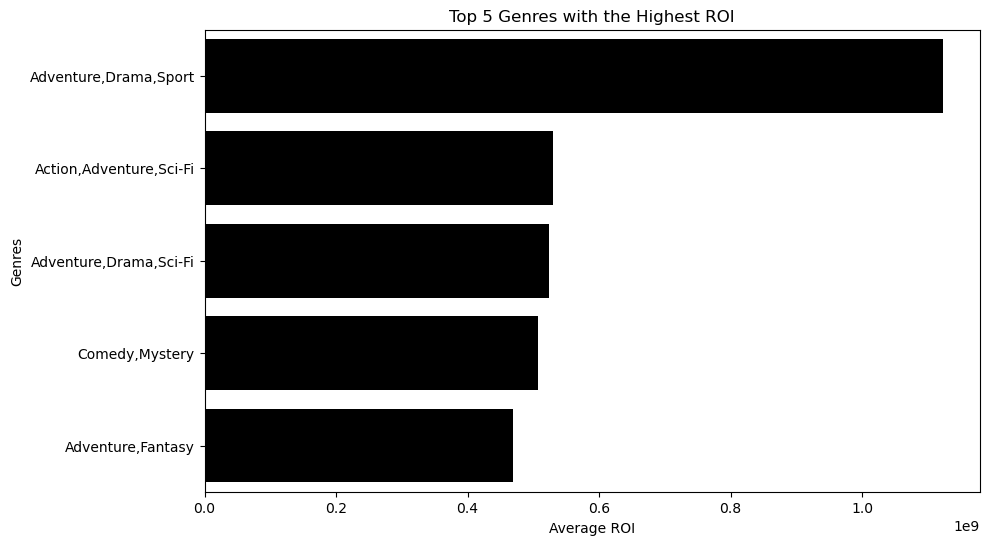

In [36]:
# Group by genres and calculate average ROI
genre_roi = movie_merged.groupby('genres')['ROI'].mean().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_roi.values, y=genre_roi.index, color="black")
plt.title('Top 5 Genres with the Highest ROI')
plt.xlabel('Average ROI')
plt.ylabel('Genres')
plt.show()


Here are the top Genres with the highest ROI respectively:

* Adventure,Drama,Sport
* Action,Adventure,Sci-Fi
* Adventure,Drama,Sci-Fi


### 2. Directors with the Highest ROI

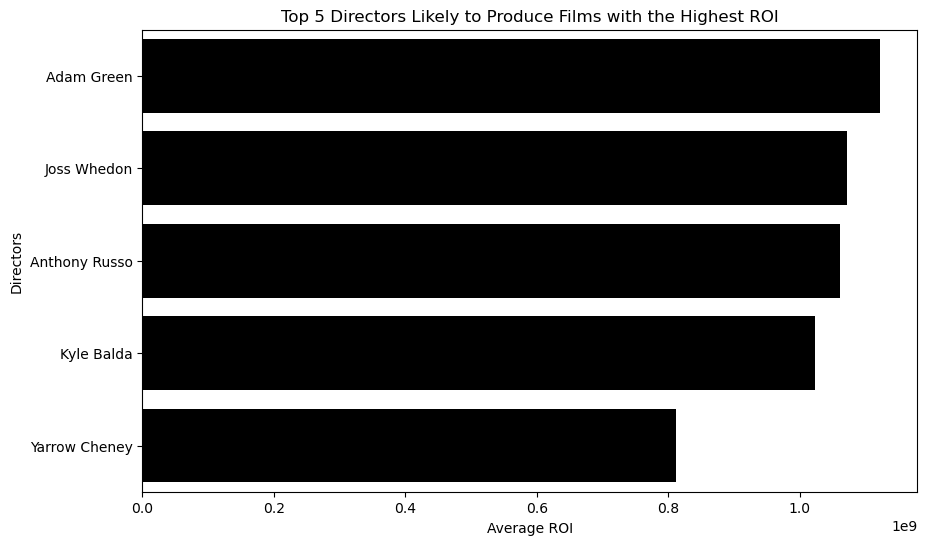

In [37]:
# Group by directors and calculate average ROI
director_roi = movie_merged.groupby('director_name')['ROI'].mean().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=director_roi.values, y=director_roi.index, color="black")
plt.title('Top 5 Directors Likely to Produce Films with the Highest ROI')
plt.xlabel('Average ROI')
plt.ylabel('Directors')
plt.show()


These Directors have a likelihood of producing films with a high ROI respectively:

* Adam Green
* Joss Whedon
* Anthony Russo

### 3. Release Months with the Highest ROI

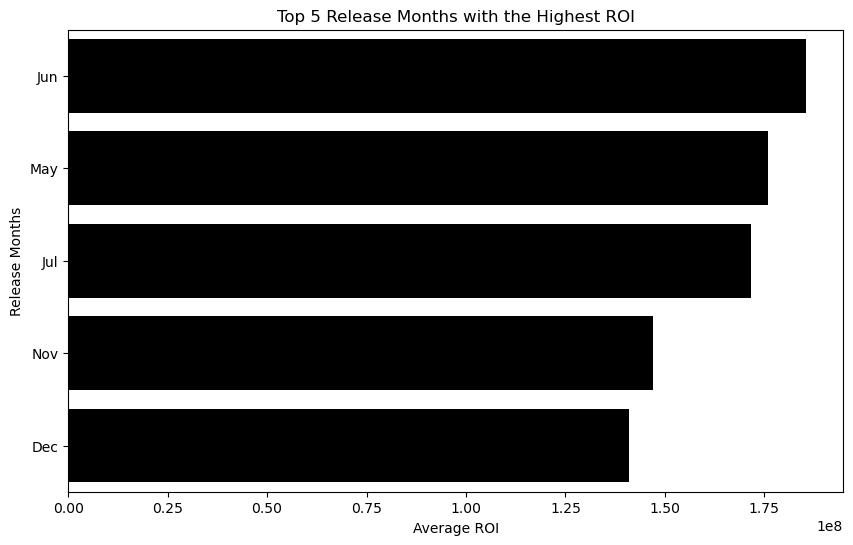

In [38]:
# Group by release months and calculate average ROI
month_roi = movie_merged.groupby('release_month')['ROI'].mean().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=month_roi.values, y=month_roi.index, color="black")
plt.title('Top 5 Release Months with the Highest ROI')
plt.xlabel('Average ROI')
plt.ylabel('Release Months')
plt.show()


Film releases in the month of June, May and July have the highest ROI respectively

### 4. Genres with their ROI in relation to their Production Budget

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


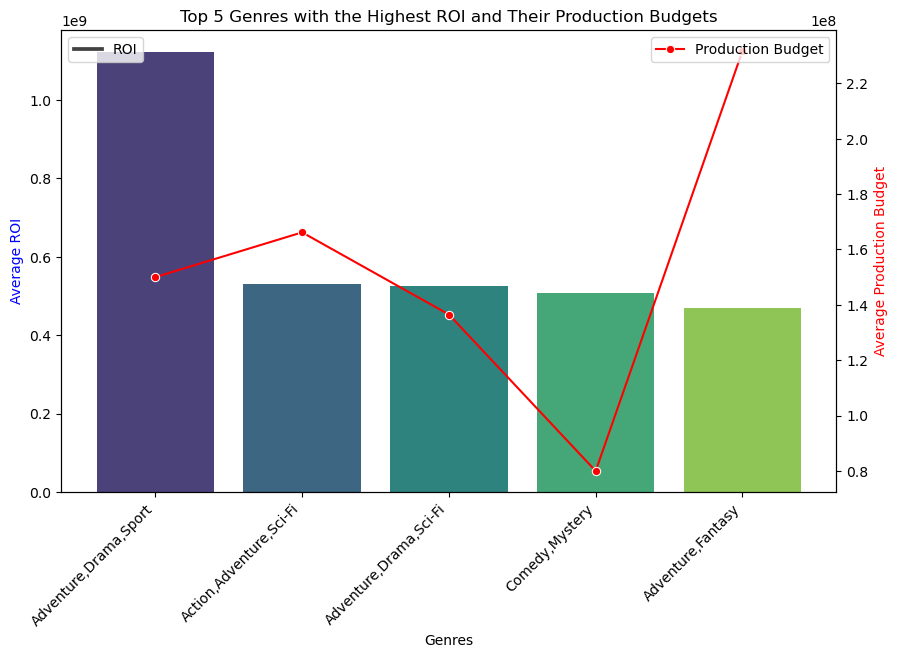

In [39]:
# Group by genres and calculate average ROI and average production budget
genre_stats = movie_merged.groupby('genres').agg({'ROI': 'mean', 'production_budget': 'mean'}).sort_values(by='ROI', ascending=False).head(5)

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for ROI
bar = sns.barplot(x=genre_stats.index, y=genre_stats['ROI'], palette="viridis", ax=ax1)
ax1.set_xlabel('Genres')
ax1.set_ylabel('Average ROI', color='blue')
ax1.set_title('Top 5 Genres with the Highest ROI and Their Production Budgets')

# Create a secondary y-axis for production budget
ax2 = ax1.twinx()
line = sns.lineplot(x=genre_stats.index, y=genre_stats['production_budget'], color='red', marker='o', ax=ax2)
ax2.set_ylabel('Average Production Budget', color='red')

# Set the legends
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.legend(['ROI'], loc='upper left')
ax2.legend(['Production Budget'], loc='upper right')

# Show the plot
plt.show()

The production budget for 'Adventure,Drama,Sport' , 'Adventure,Drama,Sci-Fi' and 'Comedy,Mystery' is lower than the ROI, which is good for business. 
Unfortunately that is not the case for 'Action,Adventure,Sci-Fi' and 'Adventure,Fantasy'

## Conclusion 

The company should invest the following genre of films:
1. Comedy,Mystery -- The production cost of this genre is affordable for a start-up and most definately has lucrative returns.
2. Adventure,Drama,Sport -- The production cost is relatively lower and has the highest ROI
3. Adventure,Drama,Sci-Fi -- The ROI is also good 

## The other Datasets

### Rotten Tomatoes

In [40]:
#Loading Rotten Tomatoes Data, head

# Define the path
rt_file_path = r'C:\Users\User\OneDrive\Desktop\phase 2 proj\dsc-phase-2-project-v3\zippedData\rt.movie_info.tsv'

# Read the TSV file directly
rotten_tomatoes = pd.read_csv(rt_file_path, sep='\t', encoding='utf-8')

# Display the first few rows of the DataFrame
rotten_tomatoes.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [41]:
#ispecting the data 
rotten_tomatoes.shape

(1560, 12)

In [42]:
#cleaning the data
#checking null values
rotten_tomatoes.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [43]:
#checking duplicates in the id column
duplicate_count = rotten_tomatoes.duplicated(subset= 'id').sum()

#dropping duplicates in the id
id_clean = rotten_tomatoes.drop_duplicates(subset='id')

In [44]:
#cleaning data
#dropping rows in the synopsis and genre columns with missing values
clean_rotten_tomatoes = rotten_tomatoes.dropna(subset=['synopsis', 'genre'])



clean_rotten_tomatoes.isnull().sum() #returns the sum of all null values

id                 0
synopsis           0
rating             0
genre              0
director         174
writer           398
theater_date     297
dvd_date         297
currency        1155
box_office      1155
runtime           13
studio          1002
dtype: int64

In [45]:
clean_rotten_tomatoes.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

### Rotten Tomatoes Reviews Data

In [46]:
# Define the path
rtreviews_file_path = r'C:\Users\User\OneDrive\Desktop\phase 2 proj\dsc-phase-2-project-v3\zippedData\rt.movie_info.tsv'

# Read the TSV file directly
rt_reviews = pd.read_csv(rtreviews_file_path, sep='\t', encoding='utf-8')

# Display the first few rows of the DataFrame
rt_reviews.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


### The Movie DB

In [47]:
#loading the TheMovieDB, head 
tmdb_movies = pd.read_csv(r'zippedData\tmdb.movies.csv')
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [48]:
tmdb_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [49]:
#inspecting the data
tmdb_movies.shape

(26517, 10)

In [50]:
#cleaning the data
tmdb_movies.isnull().sum() #returns the sum of all null values

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [51]:
#drop the unnamed column
tmdb_movies.drop(columns=['Unnamed: 0'], inplace=True)

In [52]:
tmdb_movies.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [53]:
#checking duplicates in the id column
duplicate_count = tmdb_movies.duplicated(subset= 'id').sum()

#dropping duplicates in the id
tmdb_id_clean = tmdb_movies.drop_duplicates(subset='id')

In [54]:
tmdb_id_clean.shape 

(25497, 9)